In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
metrics = ['f1', 'recall', 'cost', 'precision', 'accuracy']
paths = {
    'size-scalability': '../results/size-scalability',
    'local-work-scalability': '../results/local-work-scalability',
    'global-work-scalability': '../results/global-work-scalability',
}

prefix = 'time'
experiments = {k:{} for k in paths}

In [3]:
def process_time(file):
    with open(file) as time_file:
        lines = time_file.readlines()
        """        lines = [line.strip() for line in lines if len(line) > 2]
        times = {
            'sys':[line for line in lines if 'sys' in line],
            'user' : [line for line in lines if 'user' in line],
            'real': [line for line in lines if 'real' in line]
        }
        
        for key in times:
            values = times[key]
            values = [v.split('\t')[1] for v in values]
            values = [float(v.split('m')[0])*60 + float(v.split('m')[1][:-1].replace(',', '.')) for v in values]
            times[key] = values"""
    return [int(time) for time in lines]
#process_time("/home/dcandrade/Documents/Subjects/Computação de Alto Desempenho/hpc-facial-expression-recognition/results/size-scalability/500/time.txt")

In [4]:
from os import walk
for experiment_type in paths:
    for (dirpath, dirnames, filenames) in walk(paths[experiment_type]):
        for file in filenames:
            if file.startswith(prefix):
                subtype = dirpath.split('/')[-1]
                experiment_file = paths[experiment_type]+'/'+subtype+'/'+file
                subtype_files = experiments[experiment_type].get(subtype,[])
                #subtype_files.append(pd.read_csv(experiment_file, header=0))
                experiments[experiment_type][subtype] = process_time(experiment_file)

In [5]:
size_df = pd.DataFrame(experiments['size-scalability']).transpose().rename(index=int).sort_index()
size_df = size_df/1000 # ms to s
size_df

,0
5450,33.067
8175,33.087
10900,32.718


In [6]:
size_df = pd.DataFrame(size_df.apply(lambda x: pd.np.average(sorted(x)), axis=1))
size_df = size_df.rename(columns={0:'Tempo GPU'}).sort_index()
size_df

,Tempo GPU
5450,33.067
8175,33.087
10900,32.718


In [7]:
#size_df.apply(pd.np.std, axis=1)

In [8]:
#size_df.apply(pd.np.average)

In [9]:
serial_size = pd.read_csv("TEMPOSERIAL.csv", index_col="Tamanho do Conjunto de Treino") / 1000
serial_size

,Tempo Serial
Tamanho do Conjunto de Treino,
5450,612.203
8175,947.457
10900,1457.182


In [10]:
size_df = size_df.applymap(pd.np.average)
df = pd.concat([size_df, serial_size], axis=1)
df

,Tempo GPU,Tempo Serial
Tamanho do Conjunto de Treino,,
5450,33.067,612.203
8175,33.087,947.457
10900,32.718,1457.182


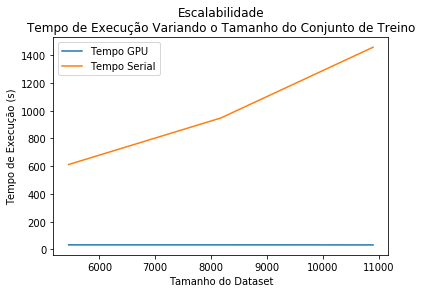

In [11]:
plot = df.plot()
plot.set_title("Escalabilidade\nTempo de Execução Variando o Tamanho do Conjunto de Treino")
plot.set_xlabel("Tamanho do Dataset")
plot.set_ylabel("Tempo de Execução (s)")
plt.savefig(paths['size-scalability']+"/size-scalability.eps", format='eps')

In [12]:
stats = size_df.applymap(pd.np.average)
stats['std'] = size_df.applymap(pd.np.std)
stats.index

Int64Index([5450, 8175, 10900], dtype='int64')

In [13]:
size_df = pd.DataFrame(experiments['local-work-scalability']).transpose().rename(index=int).sort_index()
size_df = size_df/1000 # ms to s
size_df = size_df.apply(pd.np.sort)
size_df['Tempo(s)'] = size_df.values.tolist()
size_df = size_df['Tempo(s)']
size_df = size_df.apply(lambda x: pd.np.sort(x))
size_df

16     [32.678]
32     [32.762]
64     [32.833]
128    [32.871]
256    [32.917]
Name: Tempo(s), dtype: object

Text(0, 0.5, 'Tempo (s)')

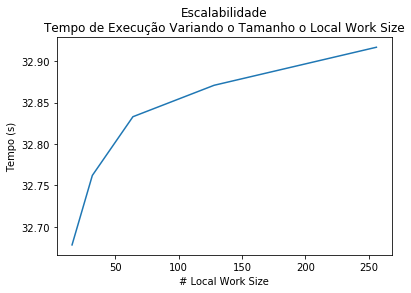

In [14]:
plot = size_df.apply(pd.np.average).plot()
plot.set_title("Escalabilidade\nTempo de Execução Variando o Tamanho o Local Work Size")
plot.set_xlabel("# Local Work Size")
plot.set_ylabel("Tempo (s)")
#plt.savefig(paths['local-work-scalability']+"/local-work-scalability.eps", format='eps')